# Use Case Summary

## Objective Statement
- Get business insight about how growth the orders from 2011 to 2014 by year and month.
- Get business insight about when monthly peak orders happened from January 2011 to December 2014.
- Get business insight about when peak date orders happend from January 2011 to December 2014
- To create customer segmentation using RFM Quantile.
- Get business insight for each customers based on label defined such as Loyal Customer, Big Spenders, Lost Cheap Customers, Best Customers and Almost Lost.

## Challenges
- Large size of data, can not be maintained by excel or spreadsheet.
- Dataset have an incorrect data type.
- There is no information where the orders happend.

## Methodology / Analytic Technique
- Descriptive Analysis: to find out information on current conditions based on the data that has been collected.
- Graph Analysis: provide information from the graph.
- Segment Analysis : RFM Quantile.

## Business Benefit
- Know how to treat customers based on their behavior when customers order. 
- Help the business team provide products or services based on the behavior of each customer.

## Expected Outcome
- Know how growth the order from 2011 to 2014 by year and month.
- Know when monthly peak from January 2011 to December 2014.
- Know when peak date from January 2011 to December 2014.
- Create customer segmentation using RFM Quartile.
- Know the label each customers based on label defined such as Loyal Customer, Big Spenders, Lost Cheap Customers, Best Customers and Almost Lost. 

# Business Understanding

**Retail business** is a business that involves selling goods or services to customers in units or retail. Consumers who buy products or services on a retail basis aim to consume them or use them personally and do not resell them. So from here we get business questions about customer segmentation as follows:
- How growth the order from 2011 to 2014 by year dan month ?
- When monthly peak orders happend from January 2011 to December 2014 ?
- When peak date orders happend from January 2011 to December 2014 ?
- How create customer segmentation using RFM Quartile ?
- How many customers based on label defined such as Loyal Customer, Big Spenders, Lost Cheap Customers, Best Customers and Almost Lost ?

# Data Understanding

## Source Data
The dataset has 4 columns and 5009 rows. This data from 4 January 2011 to 31 December 2014. 
From https://www.kaggle.com/datasets/siddinho/sample-orders-dataset-retail

## Data Dictionary
- order_date : the day when customers order
- order_id : unique number for each order
- customer : people who ordered
- grand_total : total items ordered by customers

# Data Preparation

- Programming Language : Python Version 3.9.12
- Library : pandas, numpy, matplotlib, seaborn, datetime, scipy, sklearn, plotly, feature_engine, warning 

## Import Library

In [1]:
pip install -U kaleido

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
# pip install feature_engine

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from datetime import datetime as dt2
from datetime import timedelta as td
from datetime import time as tm

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.express as px

import feature_engine
from feature_engine.outliers import Winsorizer

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

## Data Profiling

In [4]:
df = pd.read_csv('data_orders.csv')

In [5]:
df.head()

,order_date,order_id,customer,grand_total
0,9/7/2011,CA-2011-100006,Dennis Kane,378
1,7/8/2011,CA-2011-100090,Ed Braxton,699
2,3/14/2011,CA-2011-100293,Neil Franzšsisch,91
3,1/29/2011,CA-2011-100328,Jasper Cacioppo,4
4,4/8/2011,CA-2011-100363,Jim Mitchum,21


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_date   5009 non-null   object
 1   order_id     5009 non-null   object
 2   customer     5009 non-null   object
 3   grand_total  5009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 156.7+ KB


In [7]:
df.describe()

,grand_total
count,5009.000000
mean,458.626672
std,954.729307
min,1.000000
25%,38.000000
50%,152.000000
75%,512.000000
max,23661.000000


Based on the data that has been stored, it is known that the order was made **5009 times**. Where the **smallest** amount of orders is **1**, meanwhile the **largest** amount of orders is **23661** and the **average** amount of orders is **456.6**.

# Data Cleaning

In [8]:
# convert data type obj to date in order_date column
df['order_date'] = pd.to_datetime(df['order_date'])

In [9]:
df['year'] = df['order_date'].dt.strftime('%Y')
df['month'] = df['order_date'].dt.strftime('%m')
df['date'] = df['order_date'].dt.strftime('%d')

In [10]:
df.head()

,order_date,order_id,customer,grand_total,year,month,date
0,2011-09-07,CA-2011-100006,Dennis Kane,378,2011,09,07
1,2011-07-08,CA-2011-100090,Ed Braxton,699,2011,07,08
2,2011-03-14,CA-2011-100293,Neil Franzšsisch,91,2011,03,14
3,2011-01-29,CA-2011-100328,Jasper Cacioppo,4,2011,01,29
4,2011-04-08,CA-2011-100363,Jim Mitchum,21,2011,04,08


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_date   5009 non-null   datetime64[ns]
 1   order_id     5009 non-null   object        
 2   customer     5009 non-null   object        
 3   grand_total  5009 non-null   int64         
 4   year         5009 non-null   object        
 5   month        5009 non-null   object        
 6   date         5009 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 274.1+ KB


- In order_date column which stored order date customer, it should store data in date data type. But from the data we have it is known that this column stores data in objects data type. So we decided to change data type from object to date.
- From the order_date column, data also separated by year, month and date. Then saved into a new column with column names namely year, month and date.

# Exploratory Data Analysis

In [12]:
df_year = df.groupby('year')['grand_total'].sum()

df_year = pd.DataFrame(df_year)
df_year = df_year.reset_index()
df_year['percentage'] = round(df_year['grand_total'].pct_change()*100, 2)

df_year

,year,grand_total,percentage
0,2011,484260,NaN
1,2012,470539,-2.83
2,2013,608477,29.31
3,2014,733985,20.63


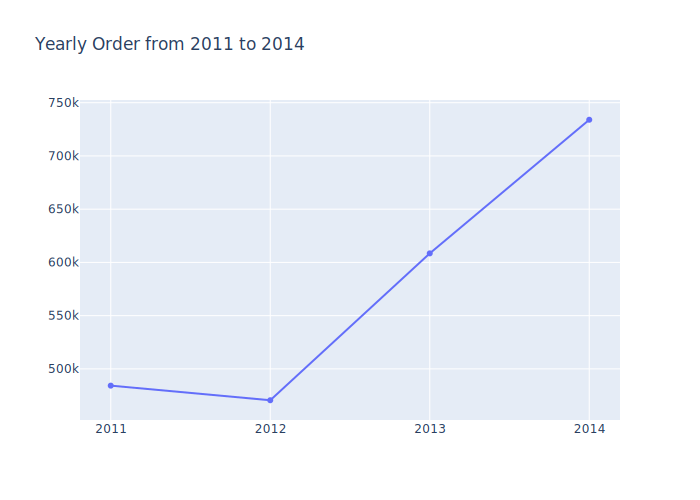

In [38]:
plot_year = [
    go.Scatter(
        x = df_year['year'], 
        y = df_year['grand_total'], 
        mode = 'lines+markers'
    )
]

plot_layout = go.Layout(
    xaxis = {'type': 'category'},
    title = 'Yearly Order from 2011 to 2014')

fig = go.Figure(data=plot_year, layout=plot_layout)
# pyoff.iplot(fig)
fig.show(renderer="svg")

Based on the data that has been collected, it is known that the orders were made from 2011 to 2014. In the first year, 2011, there were around 484.26K orders. Then in **2012** there was a **decrease in orders by 2.8%** from the previous year. However, from **2013 to 2014** the orders continued to **increase**. In 2013 there was an increase of **29.3%** and in 2014 there was an increase of **20.6%**.

In [14]:
# looking growth the orders by month
df_YearMonth = df.groupby(['year', 'month']).grand_total.sum()

df_YearMonth = pd.DataFrame(df_YearMonth)
df_YearMonth = df_YearMonth.reset_index()
df_YearMonth['percentage'] = round(df_YearMonth['grand_total'].pct_change()*100, 2)

df_YearMonth.head()

,year,month,grand_total,percentage
0,2011,01,13949,NaN
1,2011,02,4810,-65.52
2,2011,03,55695,1057.90
3,2011,04,28298,-49.19
4,2011,05,23647,-16.44


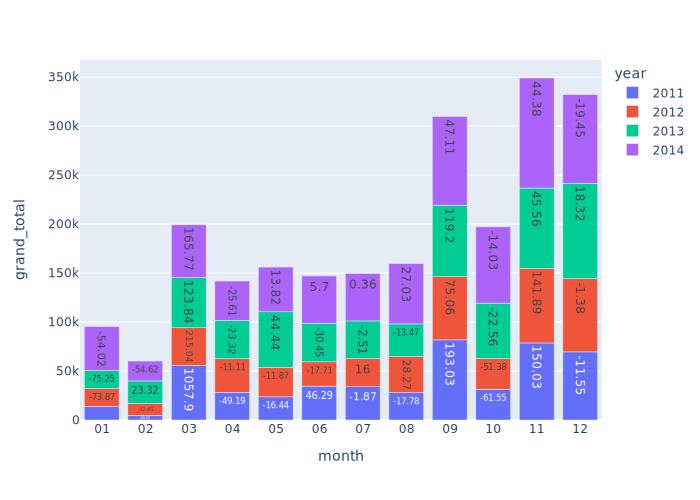

In [41]:
fig = px.bar(df_YearMonth, x='month', y='grand_total', color='year', text='percentage')

fig.show(renderer="svg");

In **2011**, total orders around **484K**, which the **highest orders** occurred in September 2011 with growth up to **193.03%** meanwhile the **lowest orders** occurred in February 2011 with a decrease up to **65%**. <br>
In **2012** total orders around **470.5K**, in this year (2012) there was a 2.8% **decrease** in orders.  Which the **highest orders** occurred in March 2012 with growth up to **215.04%** meanwhile the **lowest orders** occurred in January 2012 with a decrease up to **73.87%**.<br>
In **2013** total orders around **608.5K**, in this year (2013) there was a 29.31% **increase** in orders.  Which the **highest orders** occurred in March 2013 with growth up to **215.04%** meanwhile the **lowest orders** occurred in January 2013 with a decrease up to **75.25%**. <br>
In **2014** total orders around **734K**, in this year (2014) there was a 20.63% **increase** in orders.  Which the **highest orders** occurred in March 2014 with growth in orders of **165.77%** meanwhile the **lowest orders** occurred in January 2014 with a decrease up to **54.02%**. <br>
Based on the graph above, it can be concluded that the **highest** total orders from 2011 to 2014 occurred in **November and December**, while the **lowest** total orders from 2011 to 2014 occurred in **January and February**.

In [16]:
# peak month
df_month = df.groupby('month')['grand_total'].sum()

df_month  = pd.DataFrame(df_month)
df_month  = df_month.reset_index()

df_month.head()

,month,grand_total
0,01,95374
1,02,60175
2,03,199266
3,04,141855
4,05,156132


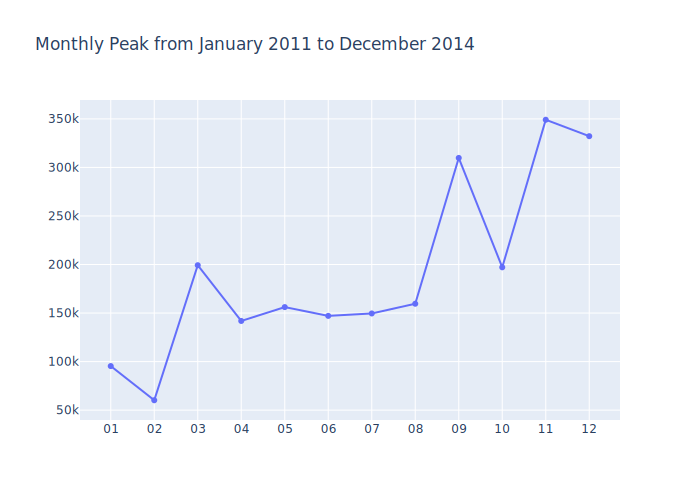

In [39]:
plot_month = [
    go.Scatter(
        x = df_month['month'], 
        y = df_month['grand_total'], 
        mode='lines+markers'
    )
]

plot_layout = go.Layout(
    xaxis = {'type': 'category'},
    title = 'Monthly Peak from January 2011 to December 2014')

fig = go.Figure(data=plot_month, layout=plot_layout)
# pyoff.iplot(fig)
fig.show(renderer="svg");

It is known that in a certain month has high total orders and low total order. Like in November which has peak monthly orders. Then in December and September also have a highest total order than other months. And the lowest total sales were in February and January. Meanwhile in April to August the total order is quite stable at around 150K.

In [18]:
# peak day
df_date = df.groupby(df.order_date.dt.day)['grand_total'].sum()

df_date  = pd.DataFrame(df_date)
df_date  = df_date.reset_index()

df_date.head()

,order_date,grand_total
0,1,71479
1,2,92541
2,3,93319
3,4,75367
4,5,71895


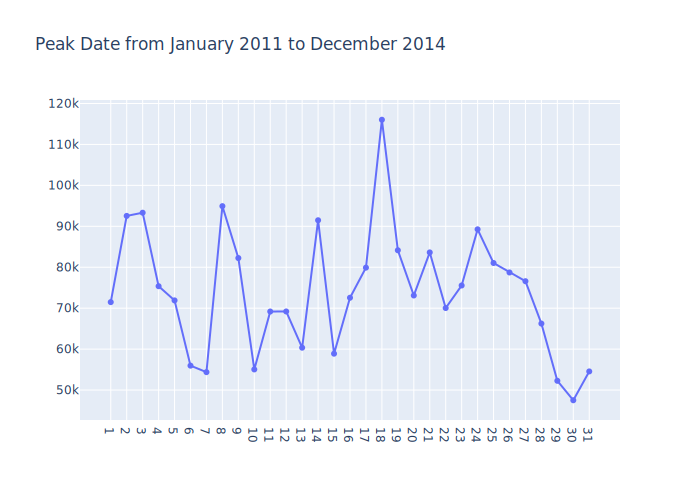

In [40]:
plot_date = [
    go.Scatter(
        x = df_date['order_date'], 
        y = df_date['grand_total'], 
        mode='lines+markers'
    )
]

plot_layout = go.Layout(
    xaxis = {'type': 'category'},
    title = 'Peak Date from January 2011 to December 2014')

fig = go.Figure(data=plot_date, layout=plot_layout)
fig.show(renderer="svg");

On three days at the beginning of the month, **1st and 3rd date** there was an **increase** in orders. Also in the middle of the month, which is on the **15th to 18th**, there is also an **increase** in orders. Meanwhile on W4 which is the **24th to the 30th** there is a **decrease** in orders.

# Preprocessing Model

In [20]:
# timebound
print(df['order_date'].min())
print(df['order_date'].max())

2011-01-04 00:00:00
2014-12-31 00:00:00


In [21]:
now = dt.date(2014, 12, 31)
df['Date'] = pd.DatetimeIndex(df.order_date).date

In [22]:
# Recency
df_recency = df.groupby(['customer'], as_index=False)['Date'].max()
df_recency.columns = ['customer', 'Last_Purchase_Date']

df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x:(now - x).days)
# df_recency.drop(columns=['Last_Purchase_Date'], inplace=True)
df_recency.head()

,customer,Last_Purchase_Date,Recency
0,Aaron Bergman,2013-11-11,415
1,Aaron Hawkins,2014-12-19,12
2,Aaron Smayling,2014-10-04,88
3,Adam Bellavance,2014-11-07,54
4,Adam Hart,2014-11-27,34


In [23]:
# Frequency
FM_Table = df.groupby('customer').agg({'order_id' : lambda x : len(x),
                                       'grand_total' : lambda x : sum(x)})

FM_Table.rename(columns = {'order_id' : 'Frequency',
                           'grand_total' : 'Monetary'}, inplace=True)

FM_Table.head()

,Frequency,Monetary
customer,,
Aaron Bergman,3,887
Aaron Hawkins,7,1744
Aaron Smayling,7,3050
Adam Bellavance,8,7756
Adam Hart,10,3249


In [24]:
RFM_Table = df_recency[['customer', 'Recency']].merge(FM_Table, left_on='customer', right_on='customer')
RFM_Table.head()

,customer,Recency,Frequency,Monetary
0,Aaron Bergman,415,3,887
1,Aaron Hawkins,12,7,1744
2,Aaron Smayling,88,7,3050
3,Adam Bellavance,54,8,7756
4,Adam Hart,34,10,3249


In [25]:
RFM_Table['Monetary'].max()

25042

# Modeling Using RFM 

Assign score from 1 to 4 to each recency, frequency and monetary. 1 is the highest value and 4 the lowest value.

In [26]:
quantiles = RFM_Table.quantile(q=[0.25, 0.50, 0.75])

quantiles = quantiles.to_dict()

In [27]:
segmented_rfm = RFM_Table.copy()

In [28]:
def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [29]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency', quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency', quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary', quantiles))
segmented_rfm.head()

,customer,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,Aaron Bergman,415,3,887,4,4,4
1,Aaron Hawkins,12,7,1744,1,2,3
2,Aaron Smayling,88,7,3050,3,2,2
3,Adam Bellavance,54,8,7756,2,2,1
4,Adam Hart,34,10,3249,2,1,2


In [30]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str) + segmented_rfm.F_quartile.map(str) + segmented_rfm.M_quartile.map(str)

segmented_rfm.head()

,customer,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment
0,Aaron Bergman,415,3,887,4,4,4,444
1,Aaron Hawkins,12,7,1744,1,2,3,123
2,Aaron Smayling,88,7,3050,3,2,2,322
3,Adam Bellavance,54,8,7756,2,2,1,221
4,Adam Hart,34,10,3249,2,1,2,212


In [31]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile', 'F_quartile', 'M_quartile']].sum(axis=1)

segmented_rfm.head()

,customer,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,Aaron Bergman,415,3,887,4,4,4,444,12
1,Aaron Hawkins,12,7,1744,1,2,3,123,6
2,Aaron Smayling,88,7,3050,3,2,2,322,7
3,Adam Bellavance,54,8,7756,2,2,1,221,5
4,Adam Hart,34,10,3249,2,1,2,212,5


# Labeling

In [32]:
print('Best Customer: ', len(segmented_rfm[segmented_rfm['RFM_Segment'] == '111'])) 
print('Loyal Customer: ', len(segmented_rfm[segmented_rfm['F_quartile'] == 1])) 
print('Big Spenders: ', len(segmented_rfm[segmented_rfm['M_quartile'] == 1])) 
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFM_Segment'] == '134'])) 
print('Lost Customer: ', len(segmented_rfm[segmented_rfm['RFM_Segment'] == '344'])) 
print('Lost Cheap Customers: ', len(segmented_rfm[segmented_rfm['RFM_Segment'] == '444'])) 

Best Customer:  30
Loyal Customer:  159
Big Spenders:  198
Almost Lost:  2
Lost Customer:  31
Lost Cheap Customers:  67


In [33]:
# Setting up the label for each client and adding the column "Label" to the dataframe
label = [0] * len(segmented_rfm)

for i in range(0,len(segmented_rfm)):

    if segmented_rfm['RFM_Segment'][i] == '111':
        label[i] = "Best Customers"
        
    elif segmented_rfm['RFM_Segment'][i] == '134' :
        label[i] = "Almost Lost"
        
    elif segmented_rfm['RFM_Segment'][i] == '344':
        label[i] = "Lost Customers"
    
    elif segmented_rfm['RFM_Segment'][i] == '444':
        label[i] = "Lost Cheap Customers"

    elif segmented_rfm['F_quartile'][i] == 1:
        label[i] = "Loyal Customers"  
    
    elif segmented_rfm['M_quartile'][i] == 1:
        label[i] = "Big Spenders"   
        
    else:
        label[i] = "Others"

In [34]:
# Adding the 'Label' column to our dataframe

segmented_rfm['Label'] = label

In [35]:
# Count the frequency that a value occurs in a dataframe column for the labels.

segmented_rfm['Label'].value_counts()

Others                  409
Loyal Customers         129
Big Spenders            125
Lost Cheap Customers     67
Lost Customers           31
Best Customers           30
Almost Lost               2
Name: Label, dtype: int64

In [36]:
sq1=segmented_rfm.groupby('Label')['customer'].nunique().sort_values(ascending=False).reset_index()
sq1.drop([0],inplace=True) # remove label others

df_sq1 = pd.DataFrame(sq1)
df_sq1['percent'] = round(((df_sq1['customer'] / df_sq1['customer'].sum()) * 100),2)

df_sq1

,Label,customer,percent
1,Loyal Customers,129,33.59
2,Big Spenders,125,32.55
3,Lost Cheap Customers,67,17.45
4,Lost Customers,31,8.07
5,Best Customers,30,7.81
6,Almost Lost,2,0.52


In [37]:
fig = go.Figure(data=[go.Bar(
            x=df_sq1['Label'],
            y=df_sq1['customer'],
            text=df_sq1['percent'],
            textposition='auto'
        )])

fig.show()

Based on the results of Customer segmentation using RFM Quartile, customers are divided into 6 segments. Namely, Loyal Customers, Big Spenders, Lost Cheap Customers, Lost Customers, Best Customers and Almost Lost.
<br>
33.59% from 384 customers or 129 customers are grouped into **Loyal Customers**. In this segment, customers have the highest order frequency than other segments.
<br>
33.59% from 384 customers or 125 customers are grouped into **Big Spenders**. In this segment, the customer has the highest total order than to other segments.
<br>
17.45% from 384 customers or 67 customers are grouped into **Lost Cheap Customers**. In this segment, customers are identified that churn because they haven't ordered for a long time, the frequency and total orders is also lower than other segments.
<br>
8.07% from 384 customers or 31 customers are grouped into **Lost Customers**. In this segment, the customers behavior are almost the same with the lost customers segment.
<br>
7.81% from 384 customers or 30 customers are grouped into **Best Customers**. In this segment the customers recently orders, has a high order frequency and a high total order too.
<br>
0.52% from 384 customers or 2 customers are grouped into **Almost Lost**. In this segment the customer recently orders but the order frequency and total of orders is low.

# Result

- In **2011** total order reach out around 484.26K, then in **2012 it decreased** up to 2.83% so that there were only around 470.5K total products order. Meanwhile, in **2013 there was an increase** in orders reach out around 29.31% or total order up to 608.47K and in **2014 also an increase** of 20.63% so that the total order product reach out around 734K.
- In **2011**, total orders around **484.26K**, which the **highest orders** occurred in September 2011 with growth up to **193.03%** meanwhile the **lowest orders** occurred in February 2011 with a decrease up to **65%**. 
- In **2012** total orders around **470.5K**, in this year (2012) there was a 2.8% **decrease** in orders.  Which the **highest orders** occurred in March 2012 with growth up to **215.04%** meanwhile the **lowest orders** occurred in January 2012 with a decrease up to **73.87%**.
- In **2013** total orders around **608.47K**, in this year (2013) there was a 29.31% **increase** in orders.  Which the **highest orders** occurred in March 2013 with growth up to **215.04%** meanwhile the **lowest orders** occurred in January 2013 with a decrease up to **75.25%**. 
- In **2014** total orders around **734K**, in this year (2014) there was a 20.63% **increase** in orders.  Which the **highest orders** occurred in March 2014 with growth in orders of **165.77%** meanwhile the **lowest orders** occurred in January 2014 with a decrease up to **54.02%**. 
- The **highest total** orders from 2011 to 2014 occurred in November and December, while the **lowest total** orders from 2011 to 2014 occurred in January and February.
- On three days at the beginning of the month, **1st and 3rd date** there was an **increase** in orders. Also in the middle of the month, which is on the 15th to 18th, there is also an increase in orders. Meanwhile on W4 which is the **24th to the 30th** there is a **decrease** in orders.
- Based on the results of Customer segmentation using RFM Quartile, customers are divided into 6 segments. Namely, Loyal Customers, Big Spenders, Lost Cheap Customers, Lost Customers, Best Customers and Almost Lost.
- 33.59% from 384 customers or 129 customers are grouped into **Loyal Customers**. In this segment, customers have the highest order frequency than other segments.
- 33.59% from 384 customers or 125 customers are grouped into **Big Spenders**. In this segment, the customer has the highest total order than to other segments.
- 45% from 384 customers or 67 customers are grouped into **Lost Cheap Customers**. In this segment, customers are identified that churn because they haven't ordered for a long time, the frequency and total orders is also lower than other segments.
- 8.07% from 384 customers or 31 customers are grouped into **Lost Customers**. In this segment, the customers behavior are almost the same with the lost customers segment.
- 7.81% from 384 customers or 30 customers are grouped into **Best Customers**. In this segment the customers recently orders, has a high order frequency and a high total order too.
- 0.52% from 384 customers or 2 customers are grouped into **Almost Lost**. In this segment the customer recently orders but the order frequency and total of orders is low.



# Recommendations

We give recommendations for each segment. First, we recommend to **Loyal Customer** segment to maintain the engagement, increase the recency and monetary with create a program like **loyalty points** that increase purchase, giving customers cashback or free shipping voucher, make sale program when big event such as christmas, new year, black friday, etc. Offering product with expensive prices that they might want to buy. <br>
Second, we recommend for **Big Spenders** segment to increase the loyalty by making loyalty points program, the points can be exchange with reward or other benefit, offering budling product that Big Spenders customers may like, that buy 2 or more product in package is cheaper than the total price every item combined. <br>
Third, we recommend for **Lost Cheap Customer** segment, that this segment customers is churn. So, better focus on acquiring new customers. <br>
Then, for **Lost Customer** segment in the verge of churn, decrease this segment by recommend things on sale that they buy in the past and focus on acquiring new customers. <br>
And then for **Best Customer** segment to increase this segment by offering  products they like, purchased, and sale. Making loyalty points program, the points can be exchange with reward or other benefit that only Best Customer can get, such as different cashback and free shipping voucher than other customers. <br>
The last, for **Almost Lost** segment, business team can increase frequency by recommend things that they may like or purchased and on sale. Giving them free shipping voucher with non-minimum purchase.